손글씨 모델

In [47]:
import pandas as pd 
import joblib
import matplotlib.pyplot as plt 
%matplotlib inline

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [49]:
df_train = pd.read_csv('../static/data/digits_train.csv')
df_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,6.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,4.0,16.0,16.0,15.0,16.0,16.0,2
1,0.0,0.0,4.0,16.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,2.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,3.0,12.0,12.0,14.0,15.0,3.0,0.0,0.0,4.0,...,0.0,0.0,2.0,15.0,16.0,14.0,3.0,0.0,0.0,5
4,0.0,0.0,6.0,11.0,16.0,16.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,5.0,16.0,13.0,0.0,0.0,0.0,5


In [50]:
import sklearn.datasets as sd
digits = sd.load_digits()

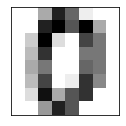

In [51]:
#이미지 보여주는 함수 plt.imshow

plt.figure(figsize=(2,2))
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
plt.xticks([]); plt.yticks([])
plt.show()

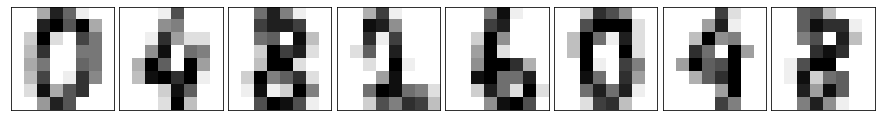

In [52]:
#그래프 보여주는 함수(https://wikidocs.net/4761)
#ax1 = fig.add_subplot(2, 1, 1) : (2, 1, 1)은 2x1(행x열),세 번째 인자 1은 생성된 두 개의 subplot 중 첫 번째 subplot

fig = plt.figure(figsize=(12, 2))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i*4], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    # ax.text(0, 7, str(digits.target[i*3]))

In [53]:
df_test =pd.read_csv('../static/data/digits_test.csv')
df_test.head()

,index,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,667,0.0,0.0,4.0,16.0,15.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.0,14.0,11.0,0.0,0.0,1
1,971,0.0,0.0,5.0,15.0,14.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4.0,11.0,13.0,16.0,11.0,0.0,9
2,914,0.0,0.0,7.0,14.0,9.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,5.0,15.0,16.0,16.0,12.0,1.0,9
3,1702,0.0,0.0,7.0,11.0,13.0,8.0,1.0,0.0,0.0,...,0.0,0.0,1.0,10.0,14.0,2.0,0.0,0.0,0.0,5
4,1356,0.0,0.0,0.0,12.0,14.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,14.0,15.0,2.0,0.0,9


In [54]:
#정규화
y_train = df_train.target.values

scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train.drop(columns='target', axis=1))
X_train.shape, y_train.shape

((1347, 64), (1347,))

In [55]:
#테스트도 진행  df_test
y_test = df_test.target.values

X_test = scaler.fit_transform(df_test.drop(columns=['index','target'], axis=1))
X_test.shape, y_test.shape

((450, 64), (450,))

In [56]:
joblib.dump(scaler, '../static/model/digits_scaler.pkl')

['../static/model/digits_scaler.pkl']

In [ ]:
#손글씨 데이터의 양이 유방암데이터보다 3배정도 많은것 같다.->파라메터설정을 더 나누어서 해보자!

1. Logistic Regression

In [12]:
lr_clf = LogisticRegression()
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
params = {
    'C': [0.1, 1, 2,3, 5, 7, 10]  
}

In [18]:
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9673
최적 파라미터: {'C': 2}


In [19]:
best_lr = grid_cv.best_estimator_
pred = best_lr.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

In [20]:
joblib.dump(best_lr, '../static/model/digits_lr.pkl')

['../static/model/digits_lr.pkl']

2. SVM

In [21]:
sv_clf = SVC()
sv_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
params = {
    #'C': [0.1, 1, 5, 7, 10]
    'C': [  5, 6, 7, 8, 9]
}
#유방암에서 최적이 7이였으니까....

In [23]:
grid_cv = GridSearchCV(sv_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9933
최적 파라미터: {'C': 5}


In [24]:
best_sv = grid_cv.best_estimator_
pred = best_sv.predict(X_test)
accuracy_score(y_test, pred)

0.9844444444444445

In [25]:
joblib.dump(best_sv, '../static/model/digits_sv.pkl')

['../static/model/digits_sv.pkl']

3. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
params = {
   
    'max_depth': [6, 8, 12, 14, 16],
    #'max_depth': [14, 16, 18, 20],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [10,50,100, 150] 
}
#유방암
#params = { 'n_estimators': [10, 50, 100], 'max_depth': [4, 6, 8, 10], 'min_samples_split': [2, 3, 4]}
#최적 파라미터: {'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 100}

In [30]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9748
최적 파라미터: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 150}


In [31]:
best_rf = grid_cv.best_estimator_
pred = best_rf.predict(X_test)
accuracy_score(y_test, pred)

0.9688888888888889

In [32]:
joblib.dump(best_rf, '../static/model/digits_rf.pkl')

['../static/model/digits_rf.pkl']

In [35]:
index = 101
scaled_test = scaler.fit_transform(df_test.drop(columns=['index','target'], axis=1))
scaled_test.shape

(450, 64)

In [36]:
test_data = scaled_test[index:index+5, :]
test_data.shape

(5, 64)

In [38]:
img_index_list = df_test['index'].values
target_index_list = df_test['target'].values
len(img_index_list), len(target_index_list)

(450, 450)

In [39]:
label_list = target_index_list[index:index+5]
label_list

array([8, 0, 0, 3, 1], dtype=int64)

In [41]:
pred_lr = best_lr.predict(test_data)
pred_sv = best_sv.predict(test_data)
pred_rf = best_rf.predict(test_data)

In [42]:
index_list = img_index_list[index:index+5]

In [43]:
result_dict = {'index':index_list, 'label':label_list,
               'pred_lr':pred_lr, 'pred_sv':pred_sv, 'pred_rf':pred_rf}

In [44]:

result_dict

{'index': array([1781,   10,   48,  865,   93], dtype=int64),
 'label': array([8, 0, 0, 3, 1], dtype=int64),
 'pred_lr': array([8, 0, 0, 3, 1], dtype=int64),
 'pred_sv': array([8, 0, 0, 3, 1], dtype=int64),
 'pred_rf': array([8, 0, 0, 3, 1], dtype=int64)}

In [45]:
img_file_wo_ext = '../static/img/digit'

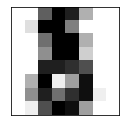

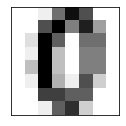

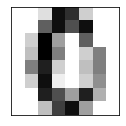

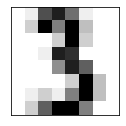

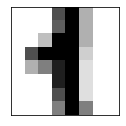

In [46]:
for k, i in enumerate(index_list):
    plt.figure(figsize=(2,2))
    plt.xticks([]); plt.yticks([])
    img_file = img_file_wo_ext + str(k+1) + '.png'
    plt.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.savefig(img_file)